<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [1]:
import os
import pandas as pd
from persiantools.jdatetime import JalaliDate
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2-پرکردن میس آیتمها با مقادیر بالایی خود
</b>
</div>

In [2]:
df = pd.read_csv(f"{working_dir}/data/eaf_with_all_feed_labels.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
df = df.ffill()
'''
label_encoder = LabelEncoder()
columns_labels = ['Coke_1030_Label','Coke_fine_Label','dolo_Label',
                  'dri_Label','lime_Label','Slag_Label']
for item in columns_labels:
    df[item] = label_encoder.fit_transform(df[item])
'''
# save For next use
df.to_csv(f"{working_dir}/data/label_encoded_eaf.csv",index=True)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- خوشه بندی و بررسی نتایج آن
</b>
</div>

(3317, 24)
(3317, 24)
                 0                     1
0  Power Off (EAF)          Delays (EAF)
1    DRI [t] (EAF)         EAF_DRI (EAF)
2   O2 [Nm3] (EAF)  Chemical [MWh] (EAF)
(3317, 2)
(3317,)


/tmp/ipykernel_11894/59613199.py:34: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


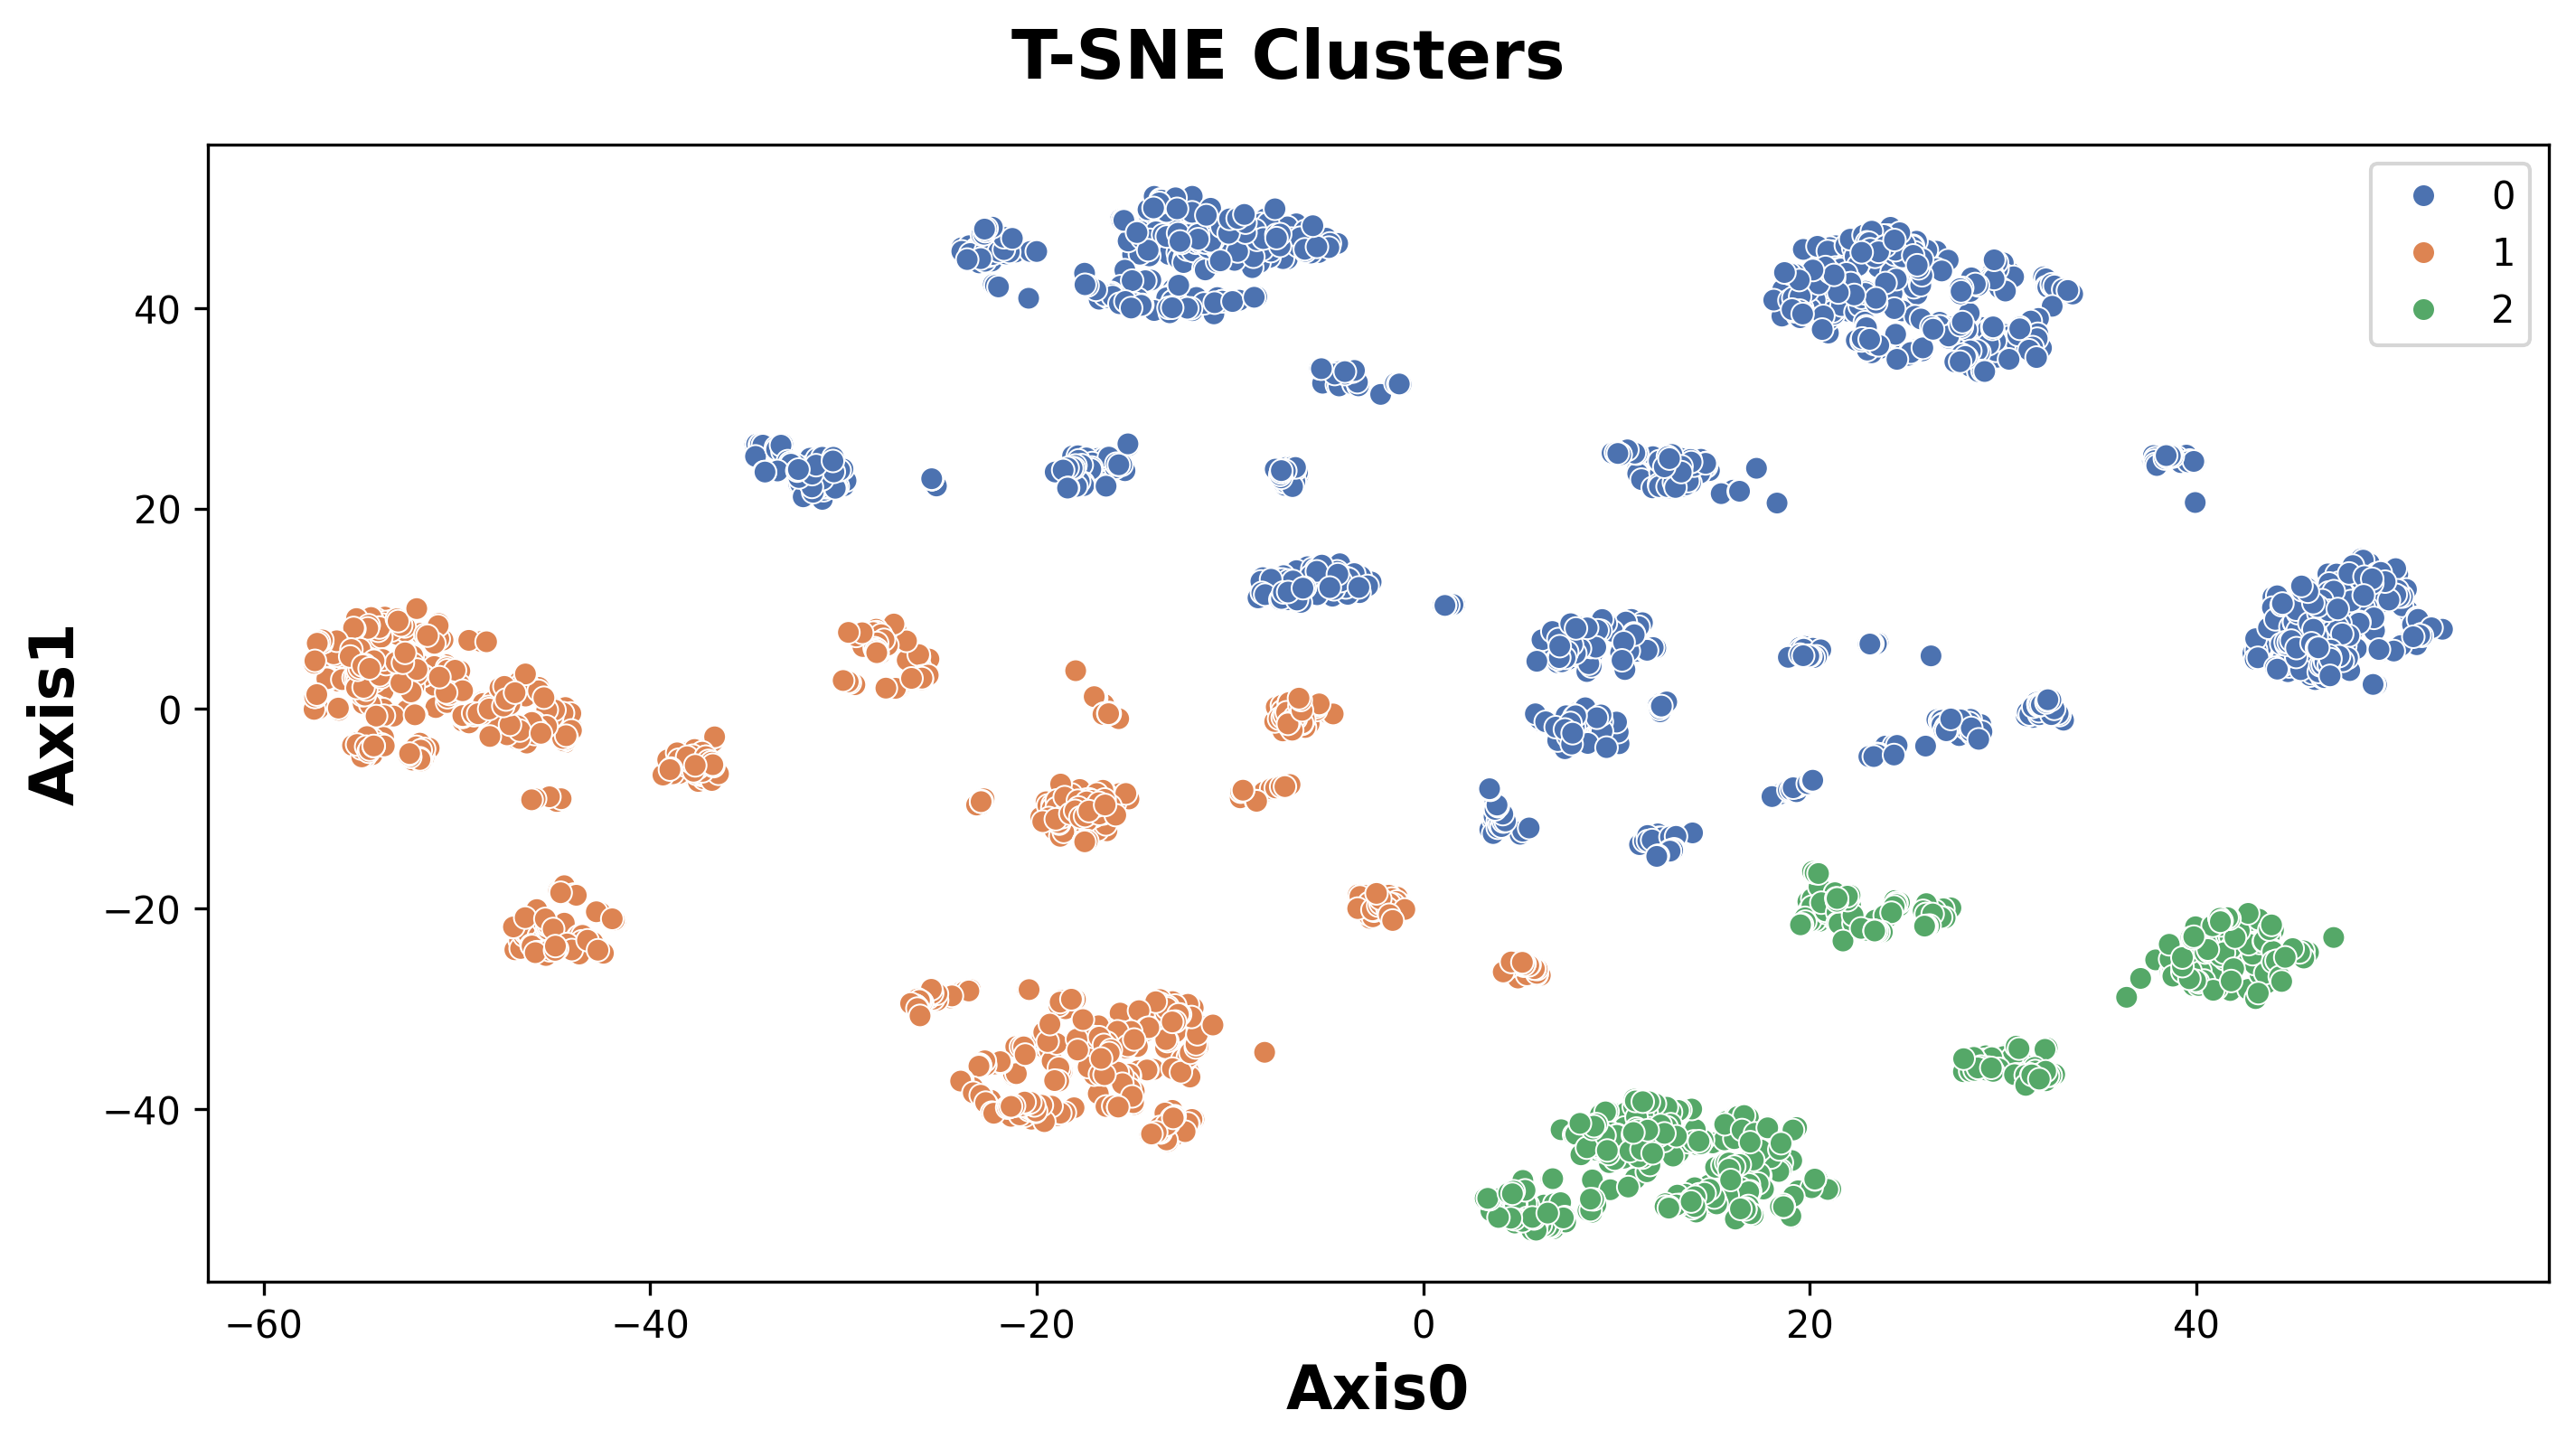

(3317, 22)
Index(['Coke1030_labels', 'CokeFine_labels', 'Dolomite_labels', 'Dri_labels',
       'Lime_labels', 'Slag_labels', 'Duration (EAF)', 'Power On (EAF)',
       'Power Off (EAF)', 'DRI [t] (EAF)', 'Ele [MW] (EAF)',
       'Tapped [t] (EAF)', 'Tapped [kWh/t] (EAF)', 'O2 [Nm3] (EAF)',
       'CH4 [Nm3] (EAF)', 'C.inj [kg] (EAF)', 'C [kg] (EAF)', 'CaO [kg] (EAF)',
       'MgO [kg] (EAF)', 'Tapping Time [Sec] (EAF)', 'HDRI(T) (EAF)'],
      dtype='object')


/tmp/ipykernel_11894/59613199.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_11894/59613199.py:66: UserWarning: Dataset has 0 variance; sk

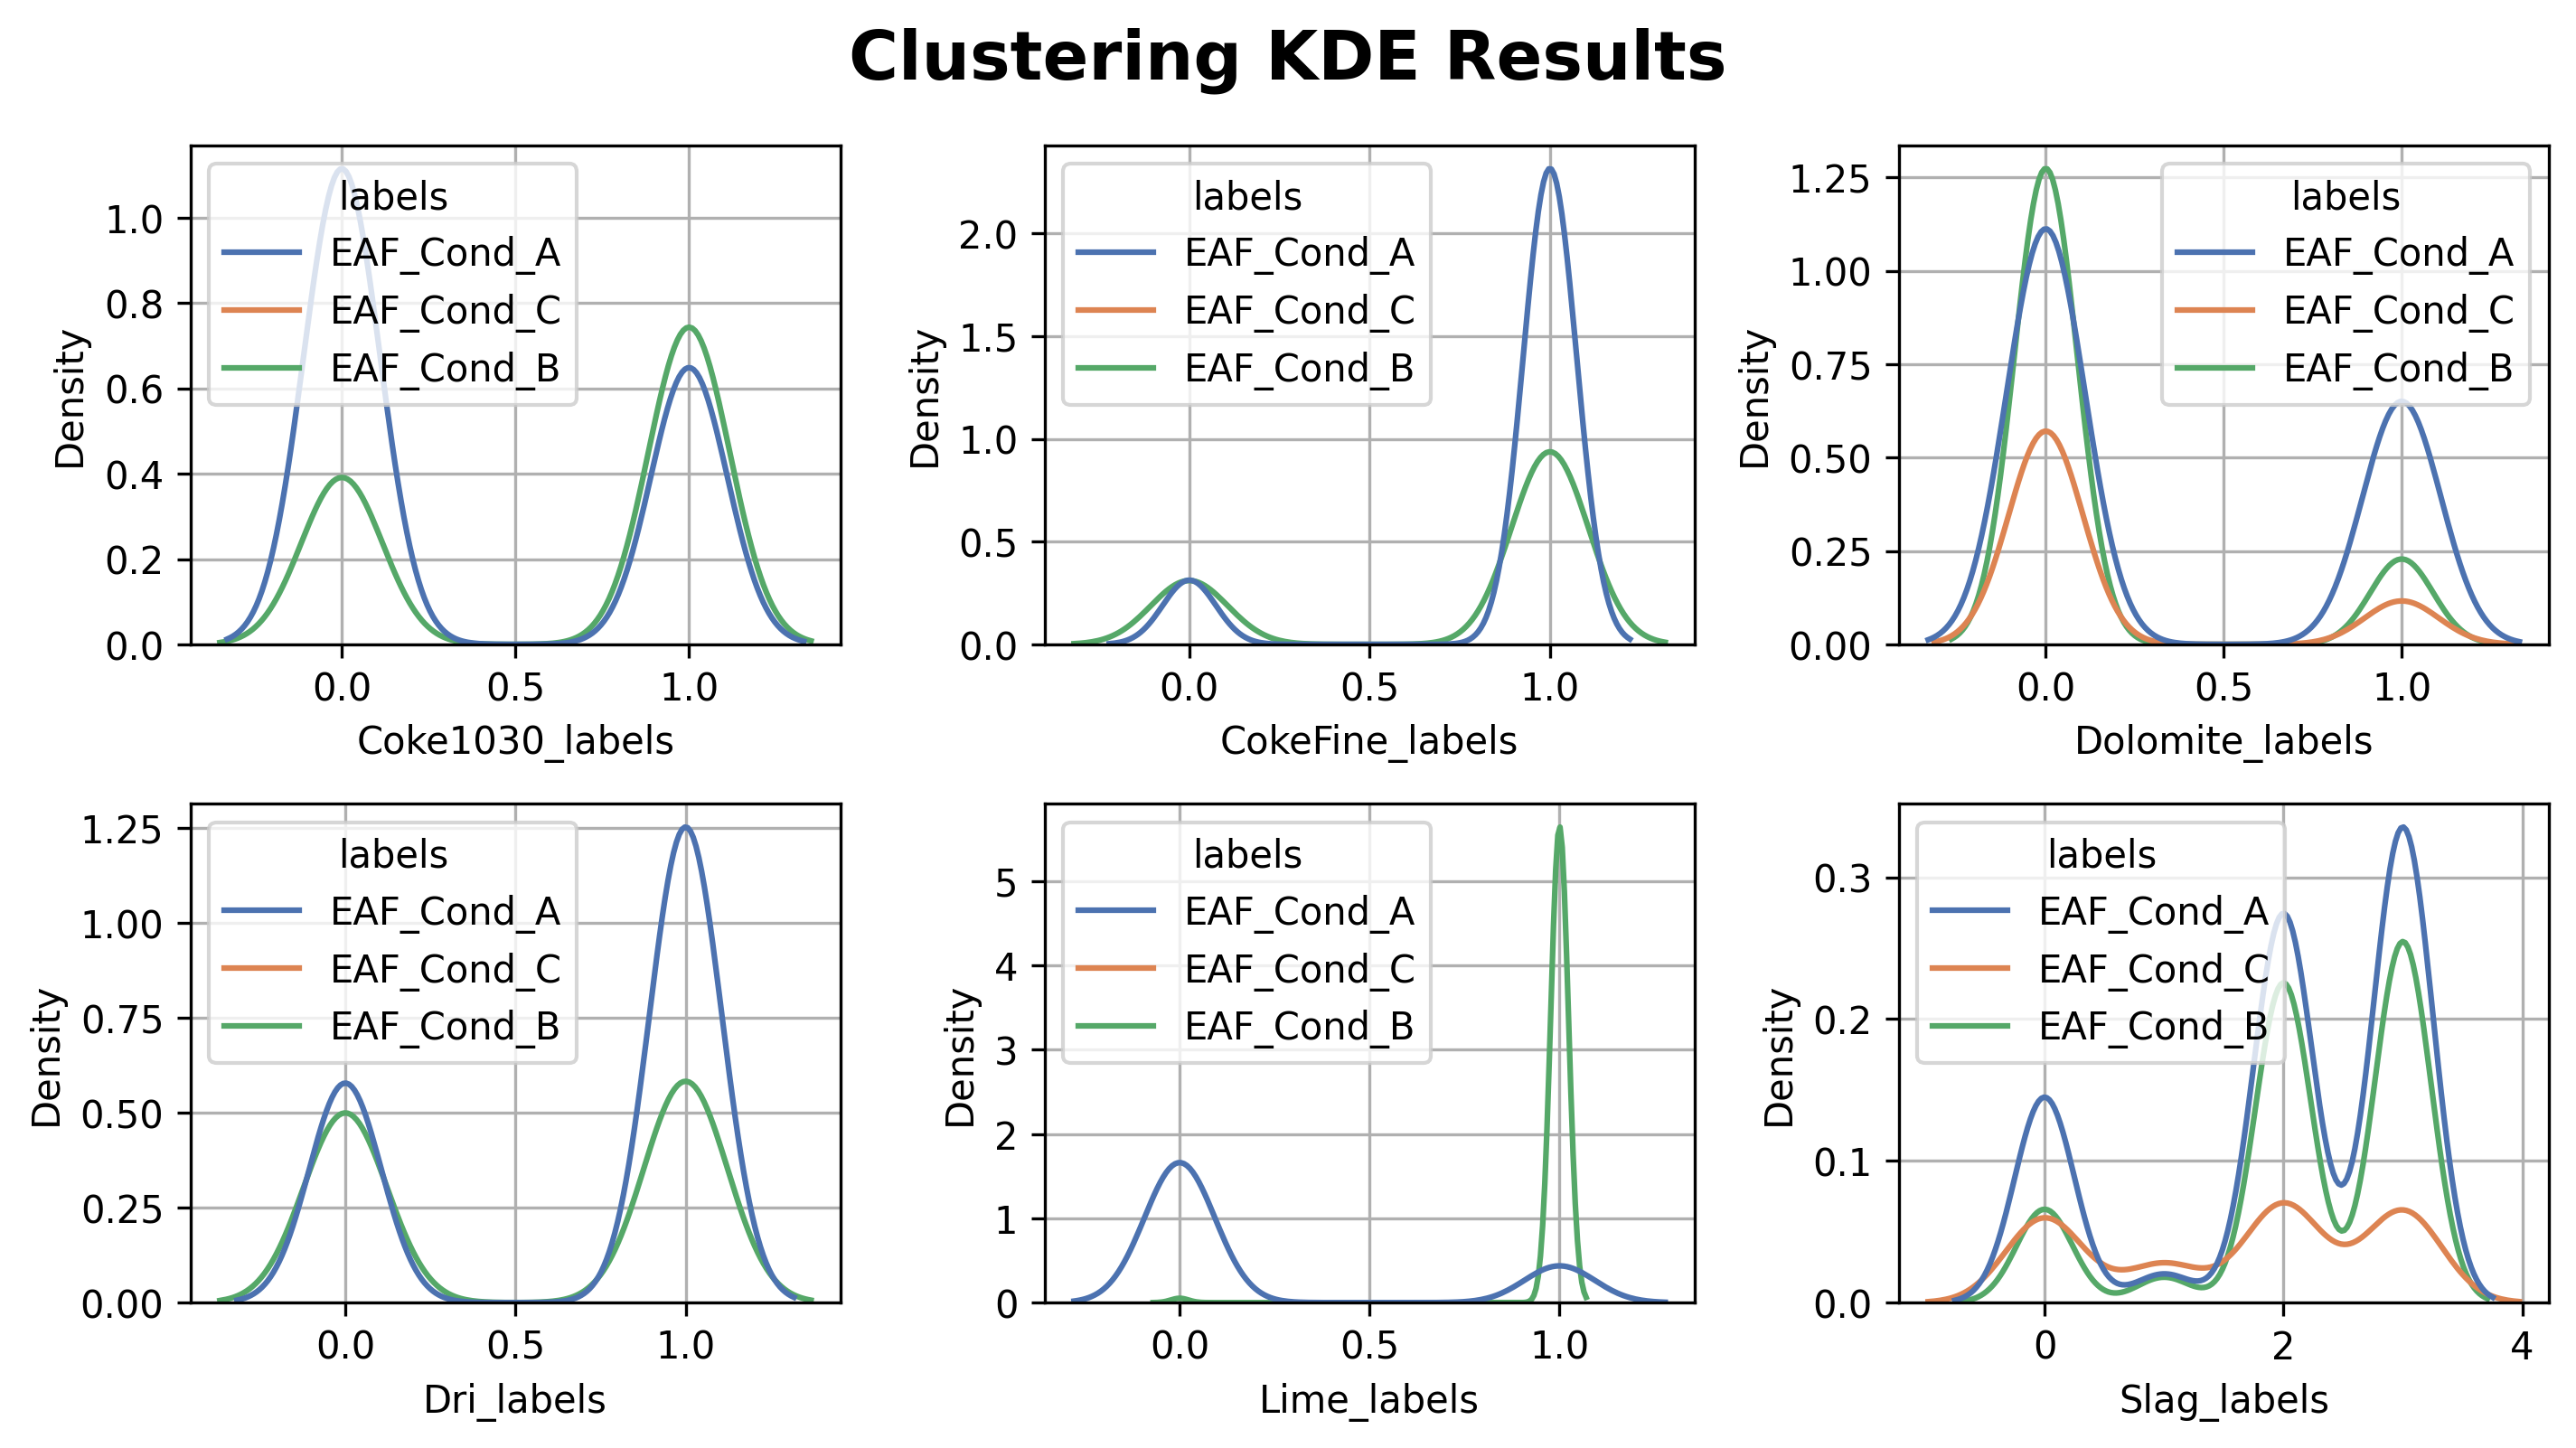

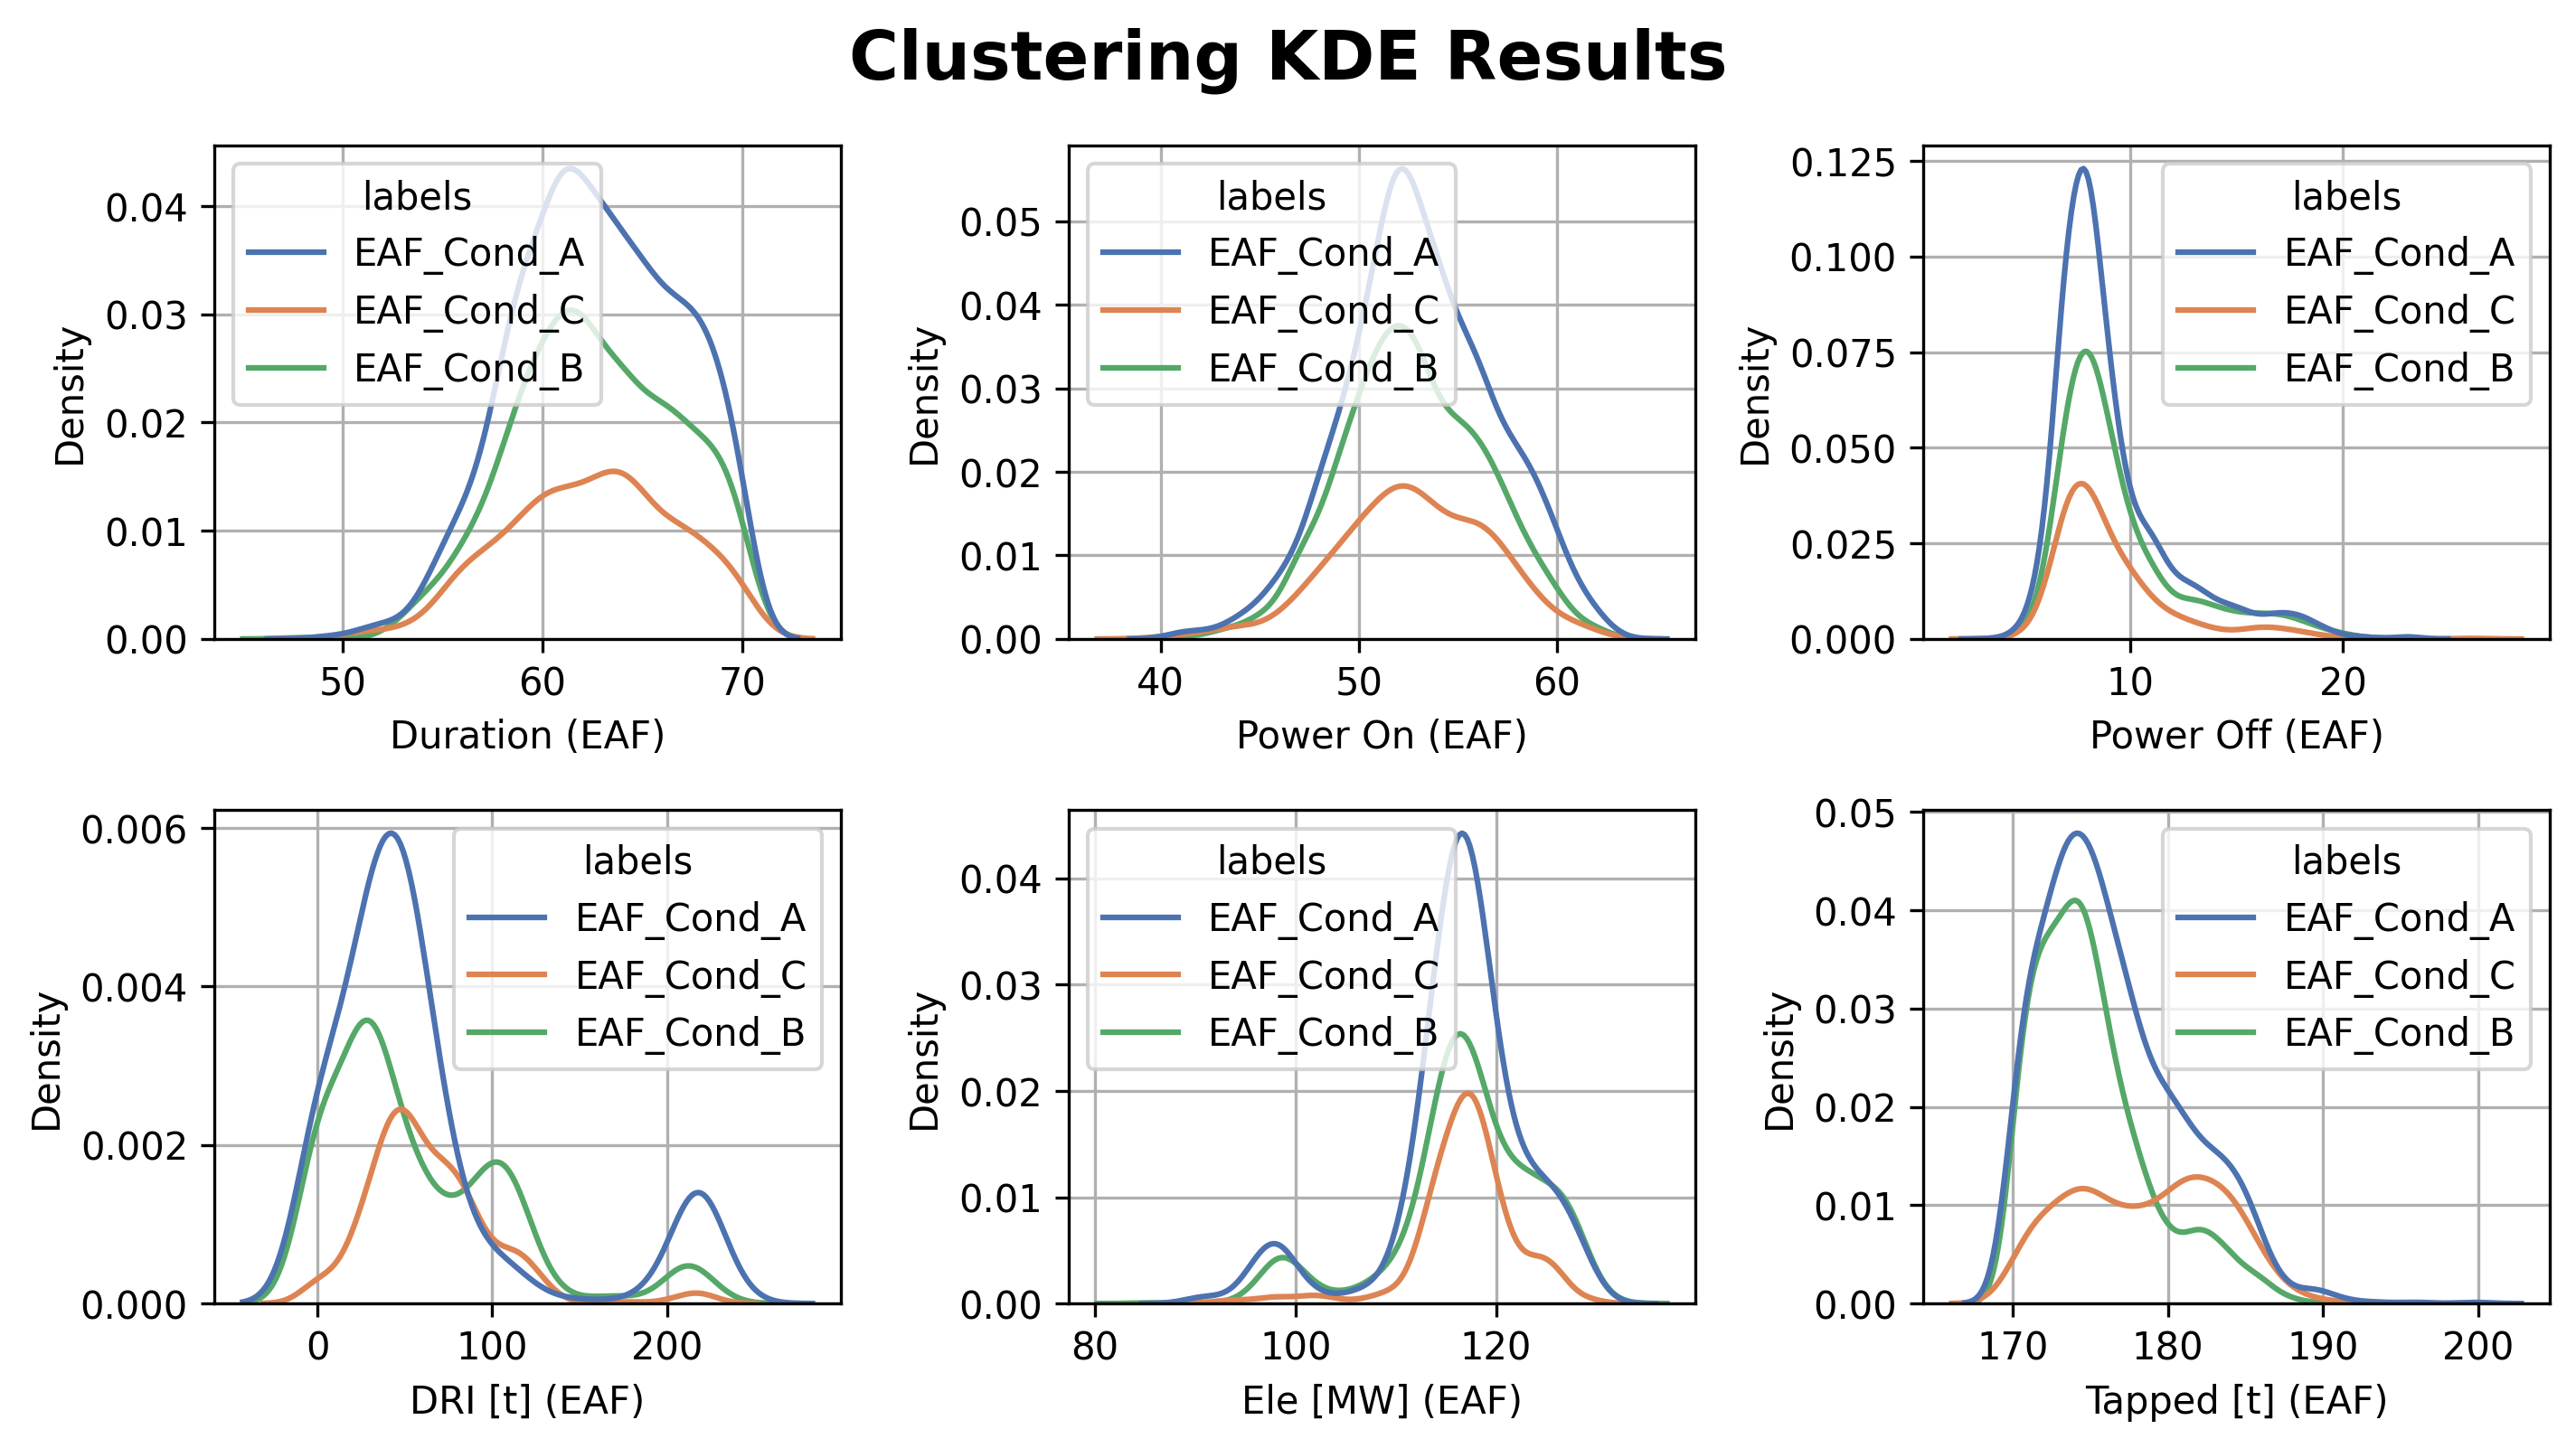

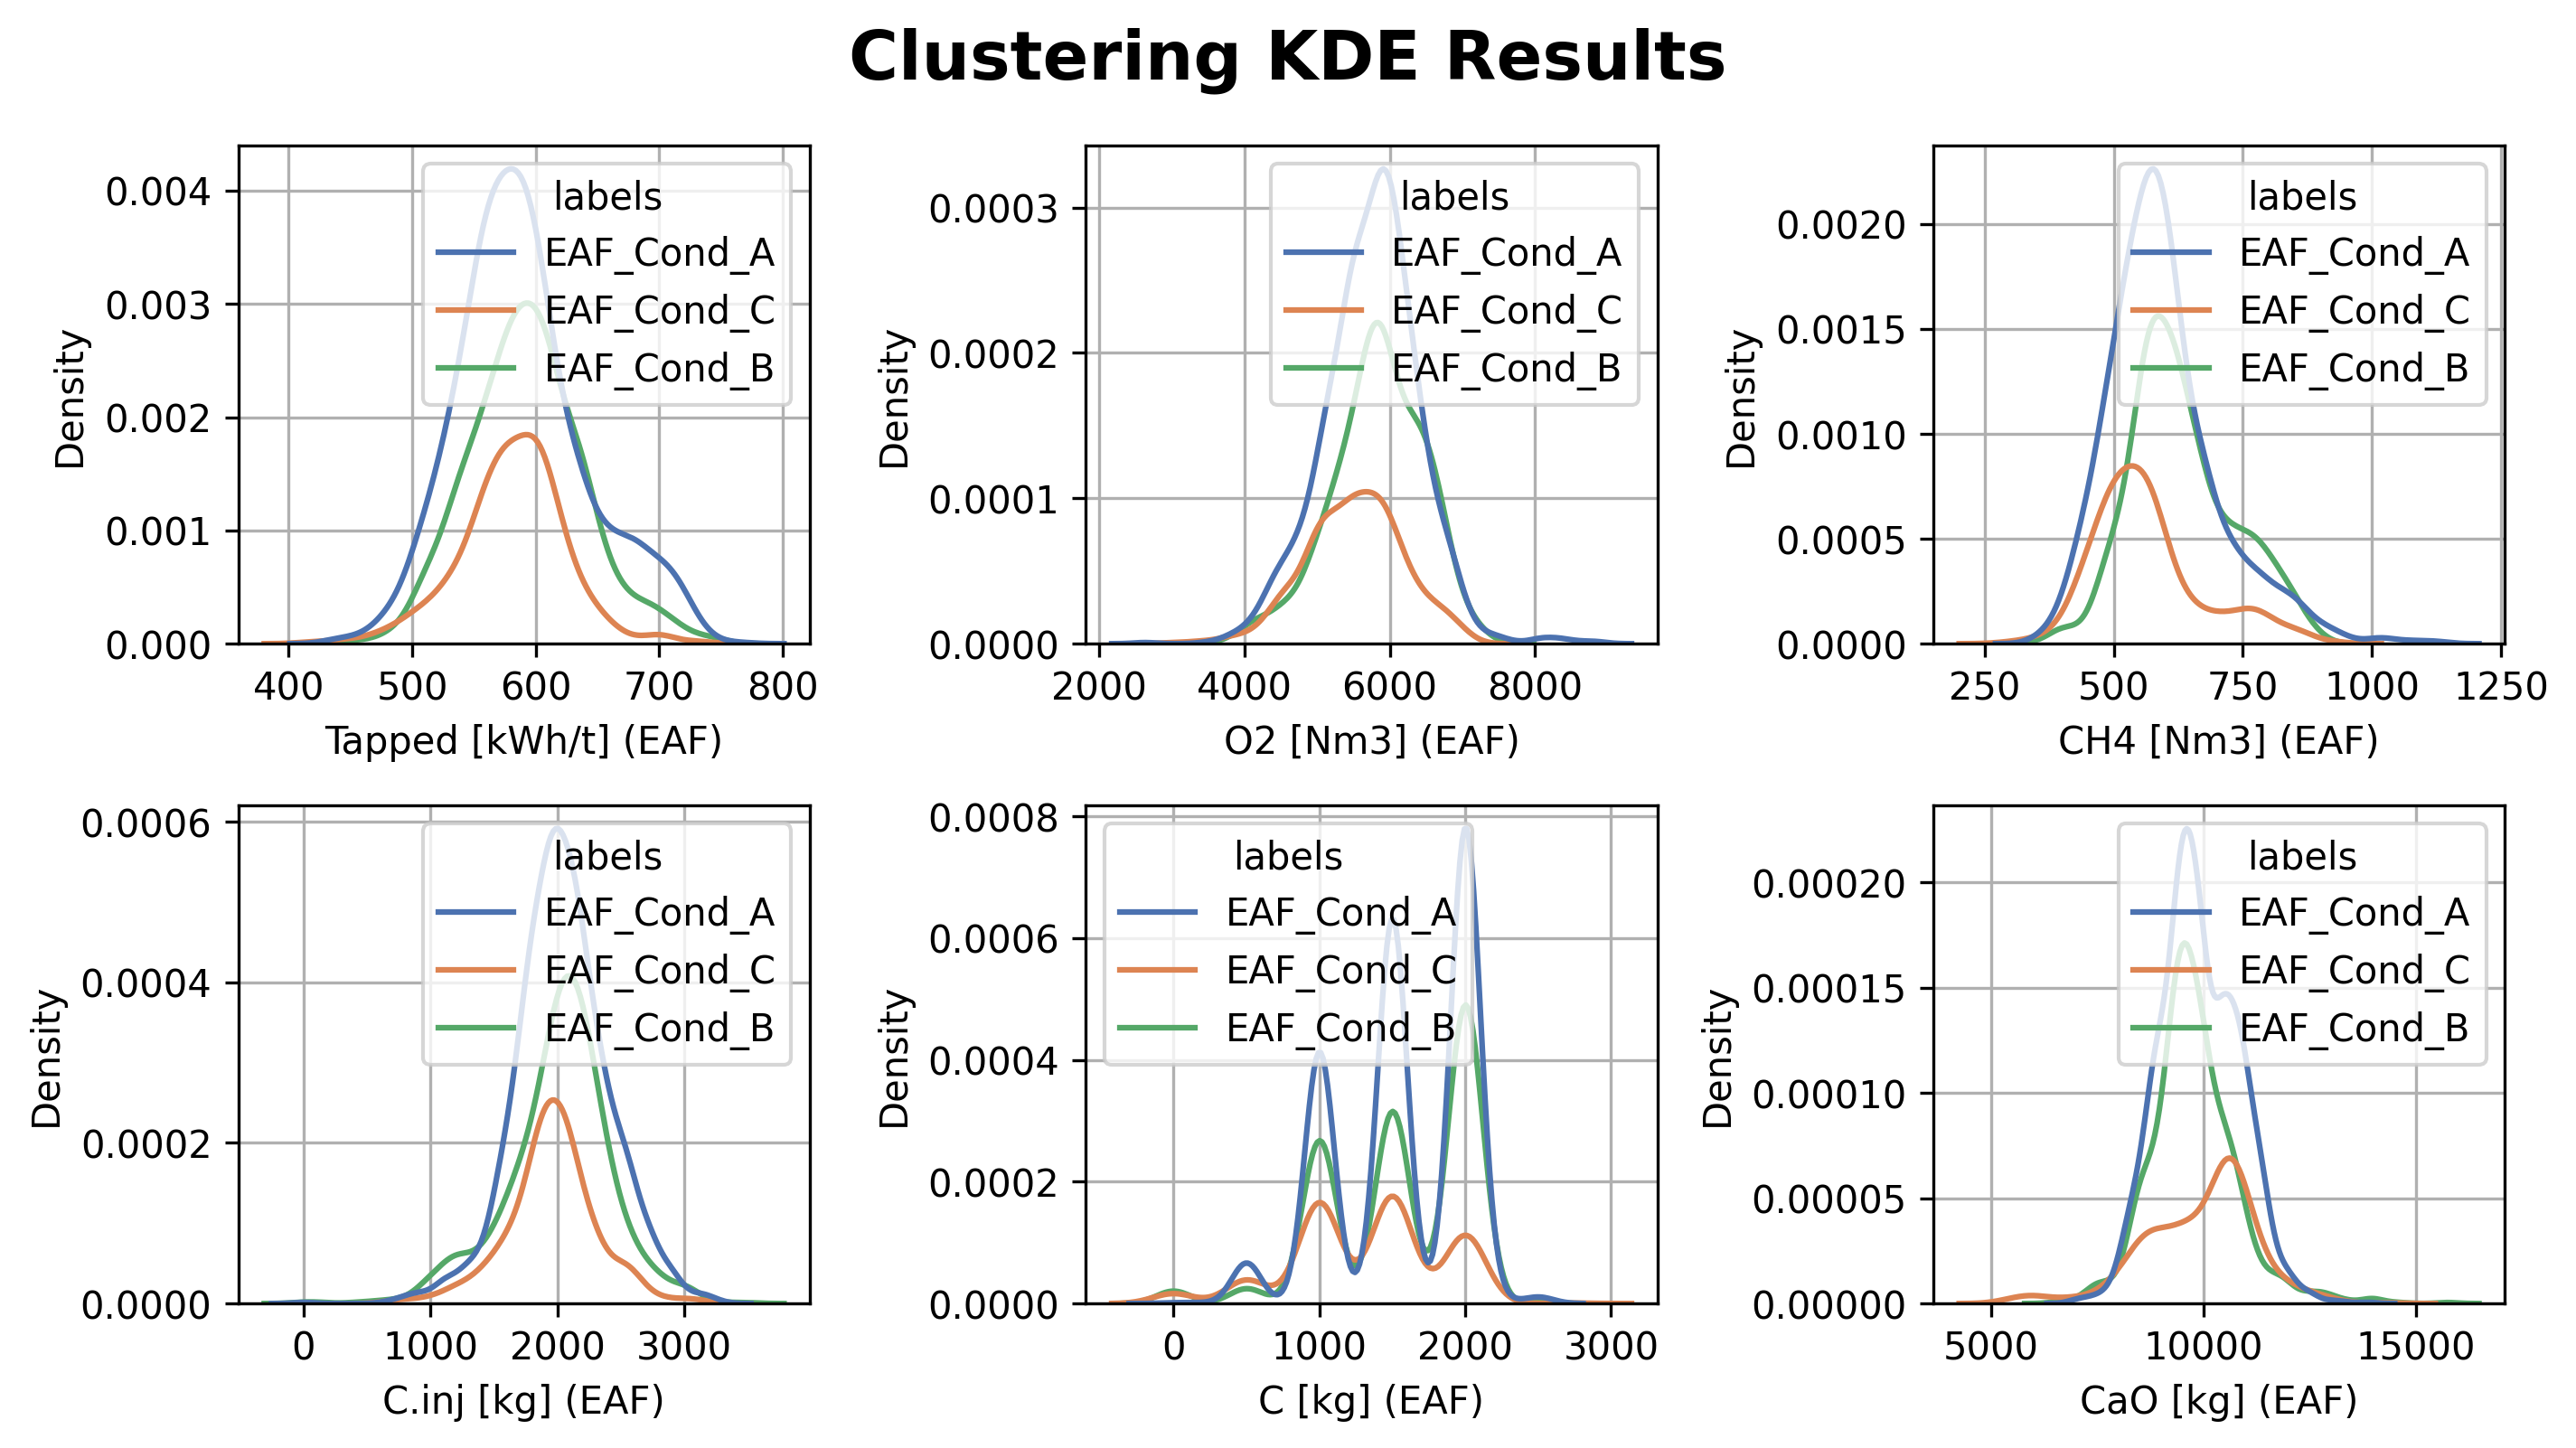

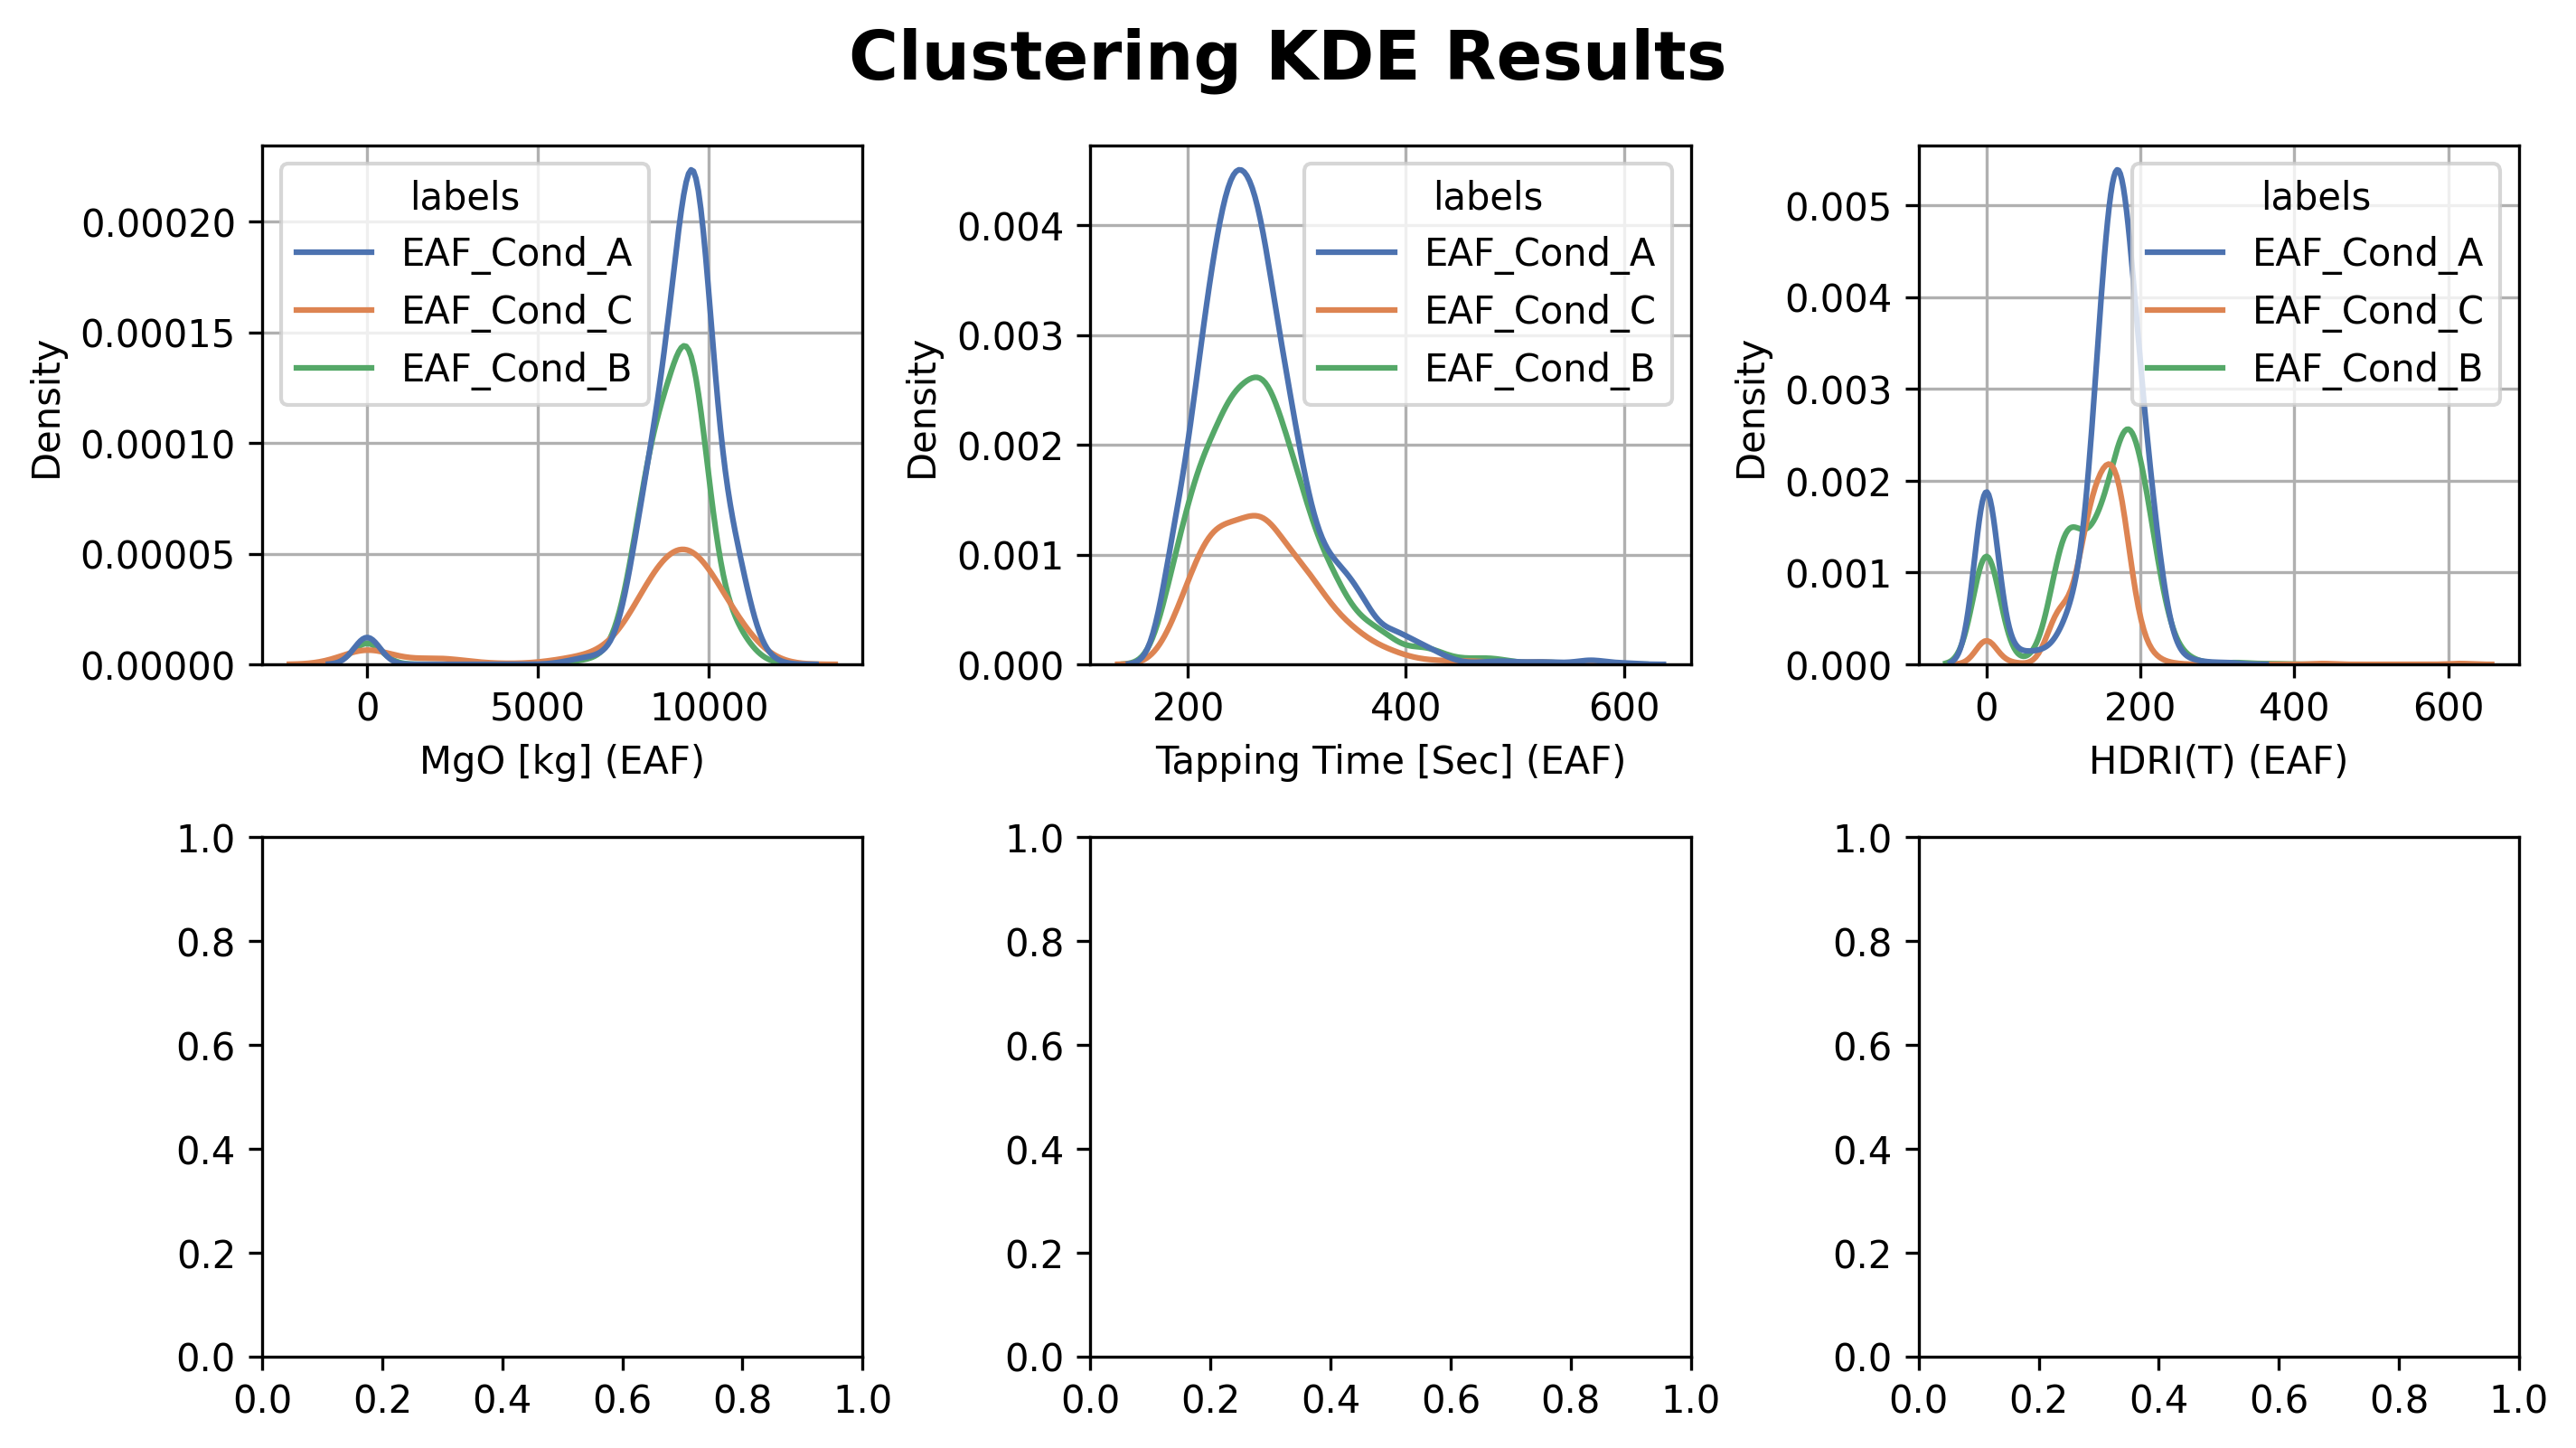

In [3]:
df = pd.read_csv(f"{working_dir}/data/label_encoded_eaf.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
df.drop(labels=['Delays (EAF)','EAF_DRI (EAF)','Chemical [MWh] (EAF)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:'EAF_Cond_A',1:'EAF_Cond_B',2:'EAF_Cond_C',3:'EAF_Cond_D',4:'EAF_Cond_D',
                    5:'EAF_Cond_E',6:'EAF_Cond_F',
                    7:'EAF_Cond_G',8:'EAF_Cond_H'
                    }
labels = [clust_lable_dict[i] for i in model.labels_]
df["labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop(['labels'])
print(plot_name)
num = 0
for k in range(4):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Clustering KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,3)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(3):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="labels",
                #hue_order=['Slag_Grade_A','Slag_Grade_B','Slag_Grade_C','Slag_Grade_D'],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
plt.show()

# save For next use
#df.to_csv(f"{working_dir}/data/eaf_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name